In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk', font_scale=1.4)
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc
from pyDOE import *
import os
from scipy.stats import norm
import math

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
class Ex4Func(object):
    def __init__(self, sigma=lambda x: 0.5):
        self.sigma = sigma

    def __call__(self, x):
        """
        Taken from Knowles et al. ref 16 of the paper.
        """
        y = 10 * math.sin(np.pi * x[0] * x[1]) + (20 * ((x[2] - 5) ** 2)) + 10 * x[3] + 5 * x[4] 
        return (y - 400) / 50.

In [3]:
dim = 5
n = 8
noise=0
sigma = eval('lambda x: ' + str(noise))

objective = Ex4Func(sigma=sigma)
X = lhs(dim, n , criterion='center')
Xnorm = (X - 0.5) /0.5
Y = np.array([objective(x) for x in X])[:, None]

In [123]:
#build the model
k = gpflow.kernels.RBF(input_dim=1)
k.lengthscales.prior = gpflow.priors.Gamma(1, 1)
# from copy import copy
# l = copy(k)
noisekern = gpflow.kernels.RBF(input_dim=1)
nonstat = hetero_kernels.NonStationaryLengthscaleRBF()
mean_func = gpflow.mean_functions.Constant(1)
m = hetero_gpmc.GPMCAdaptiveLengthscaleMultDim(Xnorm, Y, k, nonstat, mean_func)

In [124]:
for i in xrange(dim):
    print i
    m.kerns["ell" + str(i)].lengthscales.prior = gpflow.priors.Gamma(1., 1.)
    m.kerns["ell" + str(i)].variance.prior = gpflow.priors.Gamma(1., 1.)
    #m.mean_funcs["ell" + str(i)].c = 3.
    #m.mean_funcs["ell" + str(i)].c.fixed = True 
    #m.mean_funcs["ell" + str(i)].c.prior = gpflow.priors.Gamma(3,3)
m.nonstat.signal_variance.prior = gpflow.priors.Gamma(1., 1.)
# m.nonstat.signal_variance.fixed = True
m.likelihood.variance = 1e-6
m.likelihood.variance.fixed = True

0
1
2
3
4


In [125]:
m.mean_funcs["ell" + str(0)].c = 4.
m.mean_funcs["ell" + str(0)].c.fixed = True 
m.mean_funcs["ell" + str(1)].c = 1.
m.mean_funcs["ell" + str(1)].c.fixed = True 
m.mean_funcs["ell" + str(2)].c = 2.
m.mean_funcs["ell" + str(2)].c.fixed = True 

In [126]:
m.optimize(maxiter=50000) # start near MAP

      fun: array([ 5.63851748])
 hess_inv: <51x51 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -9.01013882e-03,   9.36672489e-03,   7.59369176e-02,
        -4.92410959e-03,   1.13226646e-02,   1.98933945e-02,
         9.30359350e-03,   5.68617204e-02,  -4.14650274e-02,
         3.50973529e-02,  -5.07112664e-03,   1.24863634e-02,
         5.59094980e-03,  -4.42245996e-03,  -3.14953783e-02,
         2.69931493e-03,   7.13314054e-03,   6.66994430e-03,
        -8.67545964e-03,   1.08091562e-02,   5.83533718e-04,
         2.90426786e-03,  -8.56488760e-03,   2.00418502e-03,
        -1.53982810e-03,   1.08186544e-04,  -9.35263871e-05,
         1.72344218e-03,   1.20170892e-03,  -6.52219226e-03,
        -6.61849957e-05,   7.08941513e-04,   7.20068650e-04,
         3.25023371e-04,  -1.40952770e-03,  -2.31397896e-04,
        -4.93334261e-04,  -5.55286223e-04,  -3.89669770e-04,
        -3.19269081e-03,   4.63660987e-02,  -1.67395796e-03,
         5.03673876e-02,  -2.07293301e-02,   

In [127]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp_multdim.V,[[ -5.24357488e-02 8.02350517e-02 -1.50265153e+00 -7.15832773e-02 -1.97015875e-01] [ 4.34480544e-02 -3.08809747e-01 -1.84112714e-01 -9.82627815e-02 1.18919570e-01] [ 4.69078522e-02 -2.01995985e-02 -7.74995390e-01 9.01739399e-02 1.74564602e-01] [ 1.70376494e-02 -6.16590642e-02 -1.23831946e-01 1.28030539e-02 -2.69687231e-02] [ 2.68097400e-03 -5.38874241e-02 -1.13230284e-01 7.39302009e-03 1.09034637e-02] [ 1.44479580e-03 2.85499394e-03 1.32410071e-02 -9.14427827e-05 1.69241032e-02] [ -1.37113133e-03 -1.71960967e-02 -5.11228084e-02 -1.70496767e-03 -2.46644363e-03] [ 4.95217661e-04 1.21294110e-03 1.72186020e-03 8.98163734e-04 2.80395998e-03]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp_multdim.V4,[[ 0.75227931] [-0.85281525] [-0.60975134] [-0.5426854 ] [ 1.09659445] [ 0.08536347] [-0.83770385] [ 0.08629887]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp_multdim.kern_type.lengthscales,[ 1.08271684],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp_multdim.kern_type.variance,[ 1.9216088],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp_multdim.likelihood.variance,[ 1.00000000e-06],None,[FIXED]
adaptive_lengthscale_gp_multdim.mean_func.c,[ 2.],None,[FIXED]
adaptive_lengthscale_gp_multdim.nonstat.signal_variance,[ 2.23810846],"Ga([ 1.],[ 1.])",+ve


In [128]:
mcmc_samples = 1000
num_samp_gp = 1

In [129]:
samples = m.sample(mcmc_samples, verbose=True, epsilon=0.00005, thin = 2, burn = 500, Lmax = 20)

burn-in sampling started
Iteration:  100 	 Acc Rate:  95.0 %
Iteration:  200 	 Acc Rate:  99.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  100.0 %
Iteration:  500 	 Acc Rate:  100.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  98.0 %
Iteration:  200 	 Acc Rate:  99.0 %
Iteration:  300 	 Acc Rate:  99.0 %
Iteration:  400 	 Acc Rate:  99.0 %
Iteration:  500 	 Acc Rate:  100.0 %
Iteration:  600 	 Acc Rate:  100.0 %
Iteration:  700 	 Acc Rate:  99.0 %
Iteration:  800 	 Acc Rate:  100.0 %
Iteration:  900 	 Acc Rate:  100.0 %
Iteration:  1000 	 Acc Rate:  100.0 %
Iteration:  1100 	 Acc Rate:  99.0 %
Iteration:  1200 	 Acc Rate:  100.0 %
Iteration:  1300 	 Acc Rate:  100.0 %
Iteration:  1400 	 Acc Rate:  99.0 %
Iteration:  1500 	 Acc Rate:  100.0 %
Iteration:  1600 	 Acc Rate:  100.0 %
Iteration:  1700 	 Acc Rate:  100.0 %
Iteration:  1800 	 Acc Rate:  100.0 %
Iteration:  1900 	 Acc Rate:  100.0 %
Iteration:  2000 	 Acc Rate:  99.0 %


In [130]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp_multdim.V,[[ -5.24357488e-02 8.02350517e-02 -1.50265153e+00 -7.15832773e-02 -1.97015875e-01] [ 4.34480544e-02 -3.08809747e-01 -1.84112714e-01 -9.82627815e-02 1.18919570e-01] [ 4.69078522e-02 -2.01995985e-02 -7.74995390e-01 9.01739399e-02 1.74564602e-01] [ 1.70376494e-02 -6.16590642e-02 -1.23831946e-01 1.28030539e-02 -2.69687231e-02] [ 2.68097400e-03 -5.38874241e-02 -1.13230284e-01 7.39302009e-03 1.09034637e-02] [ 1.44479580e-03 2.85499394e-03 1.32410071e-02 -9.14427827e-05 1.69241032e-02] [ -1.37113133e-03 -1.71960967e-02 -5.11228084e-02 -1.70496767e-03 -2.46644363e-03] [ 4.95217661e-04 1.21294110e-03 1.72186020e-03 8.98163734e-04 2.80395998e-03]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp_multdim.V4,[[ 0.75227931] [-0.85281525] [-0.60975134] [-0.5426854 ] [ 1.09659445] [ 0.08536347] [-0.83770385] [ 0.08629887]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp_multdim.kern_type.lengthscales,[ 1.08271684],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp_multdim.kern_type.variance,[ 1.9216088],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp_multdim.likelihood.variance,[ 1.00000000e-06],None,[FIXED]
adaptive_lengthscale_gp_multdim.mean_func.c,[ 2.],None,[FIXED]
adaptive_lengthscale_gp_multdim.nonstat.signal_variance,[ 2.23810846],"Ga([ 1.],[ 1.])",+ve


In [131]:
X_test = lhs(dim, n , criterion='center')
X_test_norm = (X_test - 0.5) /0.5
Y_test = np.array([objective(x) for x in X])[:, None]

In [132]:
samples.shape

(1000, 51)

# Model fit (training data)

## Visualizing predictions

1. Focussing on 1st dimension $x_{1}$
2. Focussing on 2nd dimension $x_{2}$
3. Focussing on 3rd dimension $x_{3}$
4. Focussing on 4rd dimension $x_{4}$
5. Focussing on 4rd dimension $x_{5}$

In [133]:
sample_df = m.get_samples_df(samples)
mean_f_mat_train = np.zeros(shape=(sample_df.shape[0], Xnorm.shape[0]))
var_f_mat_train = np.zeros(shape=(sample_df.shape[0], Xnorm.shape[0]))

for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean_f, var_f = m.predict(Xnorm)
    mean_f_mat_train[i, :] = mean_f[:,0]
    var_f_mat_train[i, :] = np.diag(var_f)

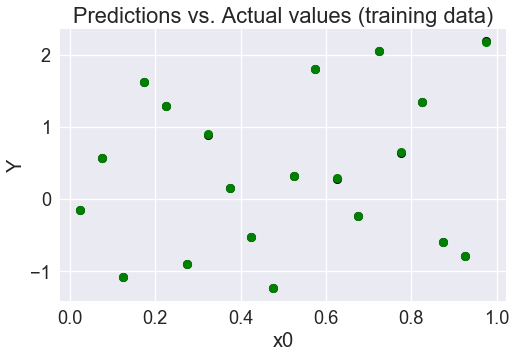

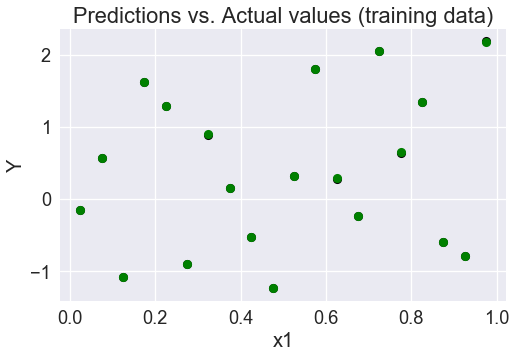

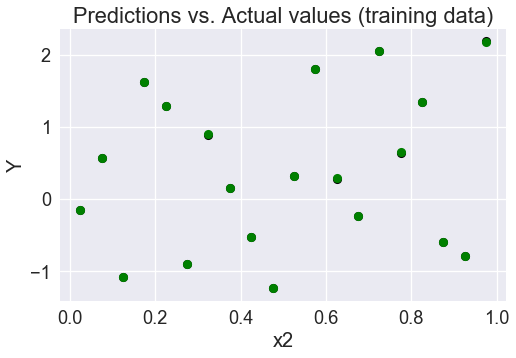

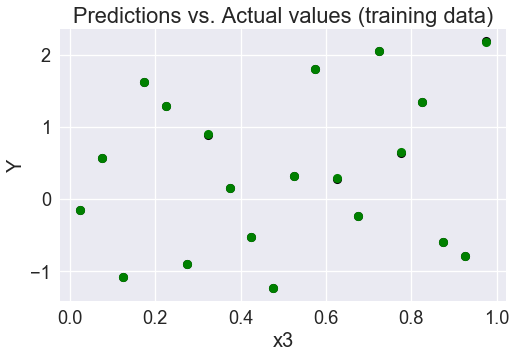

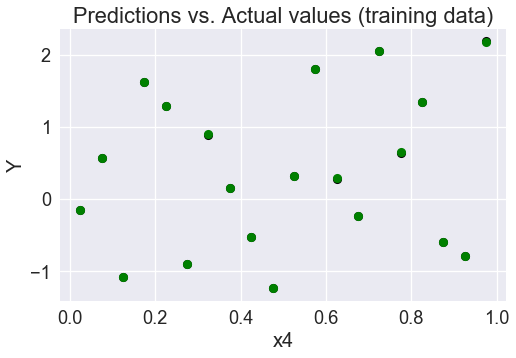

In [119]:
for i in xrange(X.shape[1]):
    plt.figure(figsize=(8,5))
    plt.plot(X[:,0], Y, 'ok')
    plt.plot(X[:,0], mean_f, 'og')
    plt.xlabel('x' + str(i))
    plt.ylabel('Y')
    plt.title('Predictions vs. Actual values (training data)')
    plt.savefig('plots/training_data_fit_dim' + str(i) + 'n' + str(n) + '.png')

# Predictions on random testing data

# Model's generalization capability on testing set

In [67]:
# Random 5 D test set
X_test = lhs(dim, 100 , criterion='center')
X_test_norm = (X_test - 0.5) /0.5
Y_test = np.array([objective(x) for x in X_test])[:, None]

In [68]:
mean_f_mat = np.zeros(shape=(sample_df.shape[0], X_test_norm.shape[0]))
var_f_mat = np.zeros(shape=(sample_df.shape[0], X_test_norm.shape[0]))

In [69]:
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean_f, var_f = m.predict(X_test_norm)
    mean_f_mat[i, :] = mean_f[:,0]
    var_f_mat[i, :] = np.diag(var_f)

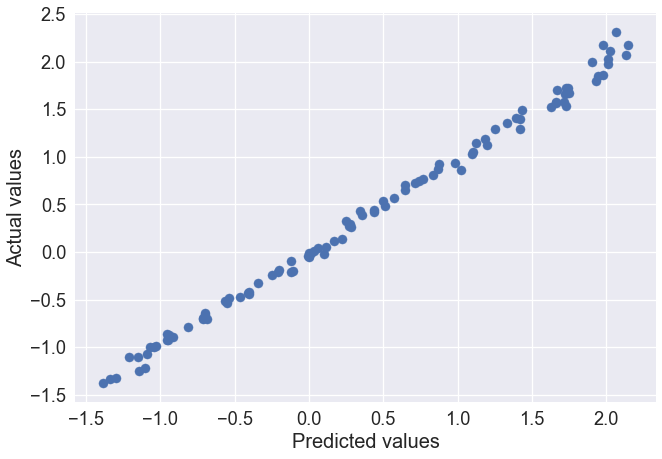

In [113]:
plt.scatter(mean_f_mat[2,:], Y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.savefig('plots/actual_vs_pred.png', dpi = 400)

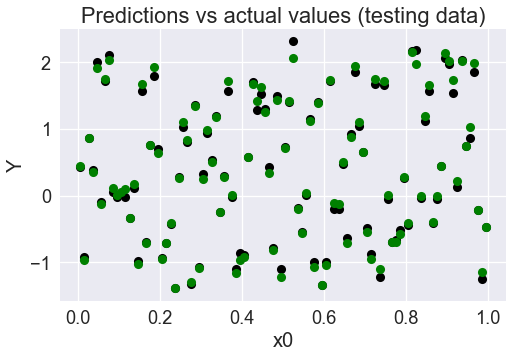

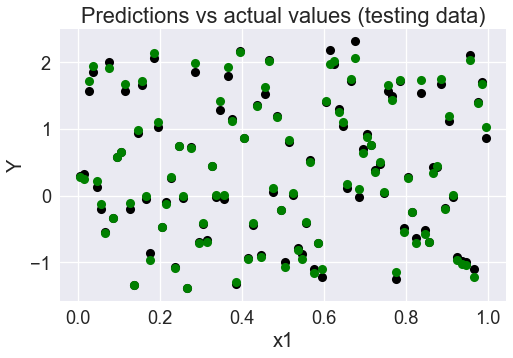

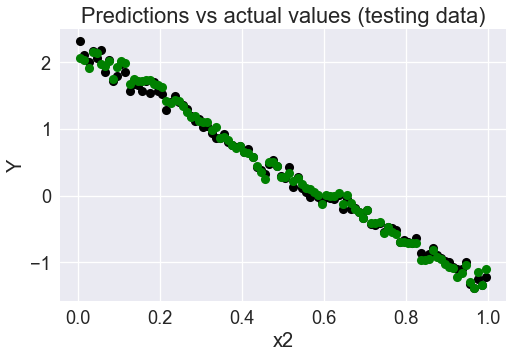

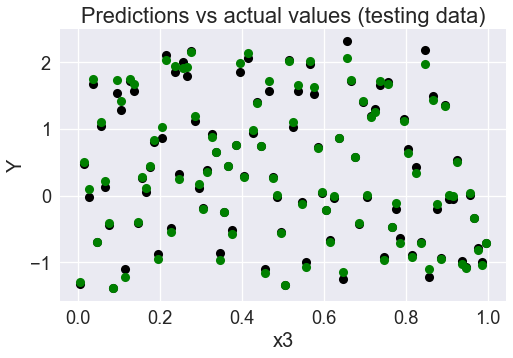

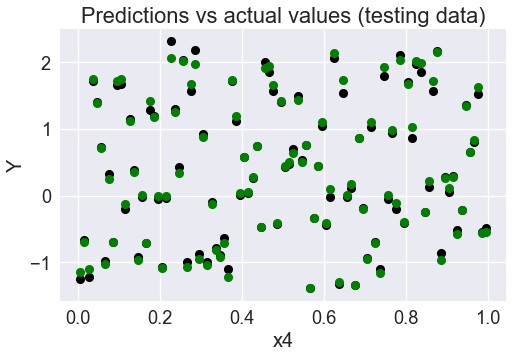

In [114]:
for i in xrange(X.shape[1]):
    plt.figure(figsize=(8,5))
    plt.plot(X_test[:,i], Y_test, 'ok', label = 'actual')
    plt.plot(X_test[:,i], mean_f_mat[0,:], 'og', label = 'predicted')
    plt.xlabel('x' + str(i))
    plt.ylabel('Y')
    plt.title('Predictions vs actual values (testing data)')
    plt.savefig('plots/actual_vs_pred_randomized_testing_dim' + str(i) + '.png', dpi = 400)
    #plt.legend(loc = 'best')

## Visualizing posterior predictive distributions

1. Focussing on 1st dimension $x_{1}$
2. Focussing on 2nd dimension $x_{2}$
3. Focussing on 3rd dimension $x_{3}$
4. Focussing on 4rd dimension $x_{4}$
5. Focussing on 4rd dimension $x_{5}$

In [96]:
x_vary = np.linspace(0,1, 50)
x_constant = np.repeat(0.5, x1.shape[0])

Xt1 = np.vstack([x_vary, x_constant, x_constant, x_constant, x_constant]).T
Xt2 = np.vstack([x_constant, x_vary, x_constant, x_constant, x_constant]).T
Xt3 = np.vstack([x_constant, x_constant, x_vary, x_constant, x_constant]).T
Xt4 = np.vstack([x_constant, x_constant, x_constant, x_vary, x_constant]).T
Xt5 = np.vstack([x_constant, x_constant, x_constant, x_constant, x_vary]).T

Y_test1 = np.array([objective(x) for x in Xt1])[:, None]
Y_test2 = np.array([objective(x) for x in Xt2])[:, None]
Y_test3 = np.array([objective(x) for x in Xt3])[:, None]
Y_test4 = np.array([objective(x) for x in Xt4])[:, None]
Y_test5 = np.array([objective(x) for x in Xt5])[:, None]

In [97]:
Xt = np.dstack([Xt1, Xt2, Xt3, Xt4, Xt5])
Xtnorm = (Xt - 0.5) /0.5
Yt = np.hstack([Y_test1, Y_test2, Y_test3, Y_test4, Y_test5])

In [98]:
print Xt.shape
print Yt.shape


(50, 5, 5)
(50, 5)


In [99]:
mean_f_mat_test = np.zeros(shape=(sample_df.shape[0], Xtnorm.shape[0],Xtnorm.shape[2]))
var_f_mat_test = np.zeros(shape=(sample_df.shape[0], Xtnorm.shape[0], Xtnorm.shape[2]))

In [100]:
mean_f_mat_test.shape

(1000, 50, 5)

In [101]:
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    for j in xrange(Xtnorm.shape[2]):
        mean_f, var_f = m.predict(Xtnorm[:,:,j])
        mean_f_mat_test[i,:,j] = mean_f[:,0]
        var_f_mat_test[i,:,j] = np.diag(var_f)
        
            
        
    

In [112]:
print Xt.shape
print Yt.shape
print mean_f_mat_test.shape

(50, 5, 5)
(50, 5)
(1000, 50, 5)


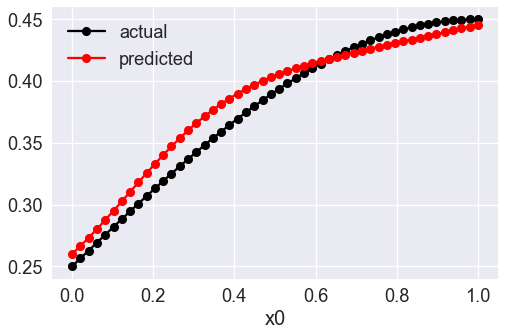

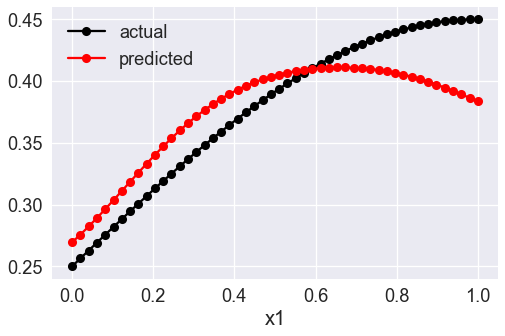

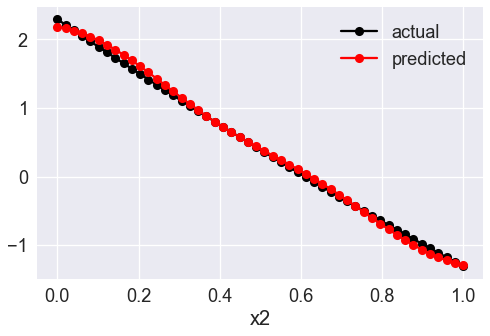

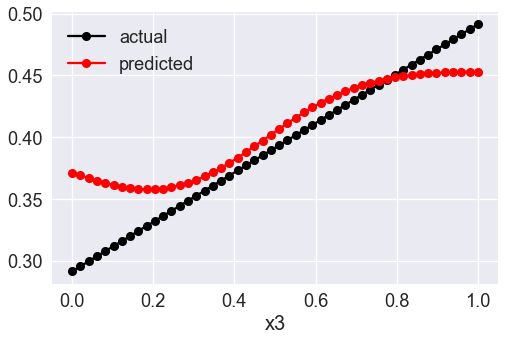

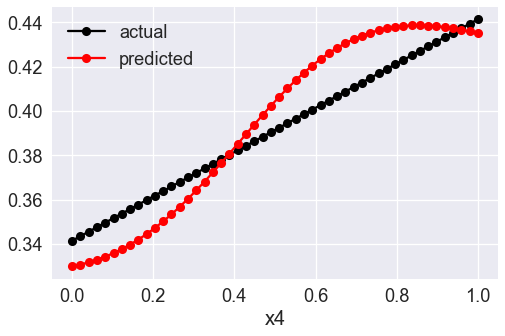

In [116]:
for i in xrange(Xtnorm.shape[1]):
    #print i
    plt.figure(figsize=(8,5))
    plt.plot(Xt[:,i,i], Yt[:,i], '-ok', label = 'actual')
    plt.plot(Xt[:,i,i], mean_f_mat_test[0,:,i], '-or', label = 'predicted')
    plt.legend(loc = 'best')
    plt.xlabel('x' + str(i))
    plt.savefig('plots/actual_vs_pred_seq_testing_dim' + str(i) + '.png', dpi = 400)
    